In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import find_peaks

In [154]:
# Parametry siatki
N = 2**11            # liczba punktów siatki - 1 w każdym kierunku
L = 400           # długość boku obszaru
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]         # krok przestrzenny

# Parametry fizyczne
ħ = 1.0
m = 1
dt = 0.05         # krok czasowy
Nt = 2**15
T_max = Nt * dt       # maksymalny czas
T_max

1638.4

In [159]:
# Początkowa funkcja falowa — funkcja Gaussa
a = 0
sigma = 0.1
ψ = (1 / (2 * np.pi * sigma**2))**0.25 * np.exp(-x**2 / (4 * sigma**2))
ψ /= np.sqrt(np.sum(np.abs(ψ)**2) * dx)

ψ0 = ψ.copy()  # zapisuję funkcję początkową do korelacji

In [160]:
# FFT: przygotowanie współrzędnych pędu
kx = 2 * np.pi * fftfreq(N, dx)
K2 = kx**2

# Fazy propagacji
T_phase = np.exp(-1j * (ħ * K2 / (2 * m)) * dt)

In [161]:
psi_t = []  # Lista funkcji falowych w kolejnych chwilach czasu
psi_t.append(ψ0.copy())

# Pętla czasowa
for _ in range(Nt):
    # pół krok w pędzie
    ψ_temp = fft(ψ)
    ψ_temp *= T_phase
    ψ = ifft(ψ_temp)
    
    # Dodaję ψ do zbioru psi w czasie
    psi_t.append(ψ.copy())

# Robienie z psi_t wektora
psi_t = np.array(psi_t)

# Czas i amplituda korelacji
t_values = np.arange(Nt) * dt


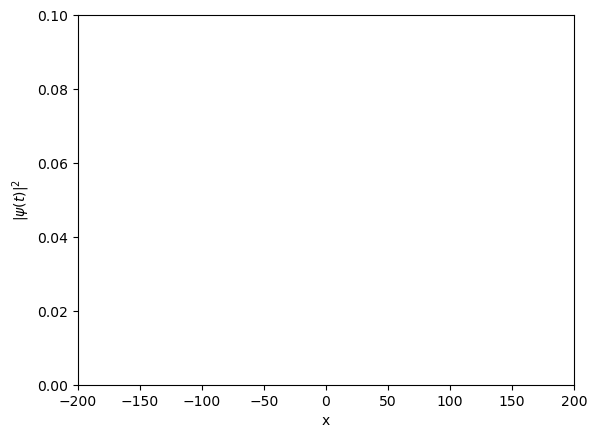

In [175]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)
line_psi_kw_liter, = ax.plot([], [], lw=1,  label="$\psi_{lit}$(x)", color = 'green')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 0.1)

ax.set_xlabel("x")
ax.set_ylabel("$|ψ(t)|^2$")
plt.show()

def init():
    line.set_data([], [])
    return line, line_psi_kw_liter

def update(frame):
    line_psi_kw_liter.set_data(x, np.abs(psi_lit[frame, :])**2)
    line.set_data(x, np.abs(psi_t[frame])**2)
    ax.set_title(f"t = {t_values[frame]:.2f}")
    return line, line_psi_kw_liter

ani = animation.FuncAnimation(fig, update, frames = range(0, Nt//64, 1), init_func=init, blit=True)

In [176]:
# Robię filmik ewolucji funkcji w czasie

from matplotlib.animation import FFMpegWriter
import matplotlib as mpl

mpl.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\ffmpeg.exe'

writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=2800)
ani.save("cząstka swobodna.mp4", writer=writer)

In [162]:
T, X = np.meshgrid(t_values, x, indexing='ij')

'\npsi_kw_liter = (\n    1 / np.sqrt(2 * np.pi * (sigma**2 + ħ**2 * T**2 / (4 * m**2 * sigma**2)))\n    * np.exp(-X**2 / (2 * (sigma**2 + ħ**2 * T**2 / (4 * m**2 * sigma**2))))\n)\n'

In [163]:
psi_lit = (2 * np.pi)**(-0.25) * (sigma + 1j * T / (2 * sigma))**(-0.5) * np.exp(-X**2 / (4*sigma**2 + 2j*T))
psi_lit /= np.sqrt(np.sum(np.abs(psi_lit)**2, axis=1)[:, None] * dx)

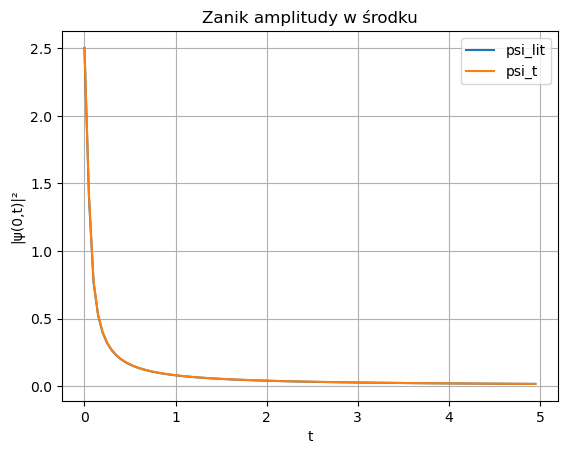

In [164]:
import matplotlib.pyplot as plt

center_index = np.argmin(np.abs(x))  # indeks najbliższy x = 0

psi_center_vals = np.abs(psi_lit[:, center_index])**2
psi_t_c = np.abs(psi_t[:, center_index])**2

plt.plot(t_values[:100], psi_center_vals[:100], label='psi_lit')
plt.plot(t_values[:100], psi_t_c[:100], label='psi_t')
plt.xlabel("t")
plt.ylabel("|ψ(0,t)|²")
plt.title("Zanik amplitudy w środku")
plt.grid(True)
plt.legend()
plt.show()
